In [175]:
! pip install plotnine

In [176]:
import pandas as pd
from plotnine import *
from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA, TruncatedSVD
from util.datasource import anything, corroles
from util.analysis import ext_modes, plot_selector, perc_comp, perc_ext


In [177]:
df = corroles.dataFrame

In [178]:
conformation = df[perc_ext].fillna(0)

In [179]:
tsne = TSNE(n_components=2, learning_rate=100, method="exact")

In [180]:
X = conformation.values

In [181]:
mapping_tsne = tsne.fit_transform(X)

In [182]:
df_tsne = pd.DataFrame(mapping_tsne, columns=["x", "y"])

In [183]:
df_tsne["category"] = df["category"]
df_tsne["CCDC"] = df["CCDC"]
df_tsne["M"] = df["M"]
df_tsne["Group"] = df["Group"]
df_tsne["Doop"] = df["Doop (exp.)"]
df_tsne["Cavity"] = df["Cavity"]
df_tsne = df_tsne.astype({"Group": "str"})
df_tsne


,x,y,category,CCDC,M,Group,Doop,Cavity
0,9.458344,10.079230,f-Block Corrole,1524773,Dy,Ln,0.176309,6.654947
1,-17.797543,-22.231138,f-Block Corrole,1482209,Ce,Ln,0.769404,7.231808
2,-10.555456,-28.010714,f-Block Corrole,930334,U,Ln,1.237161,7.232352
3,-10.512471,-28.227942,f-Block Corrole,930333,Th,Ln,1.278831,7.374410
4,-19.058149,-29.331270,f-Block Corrole,1498989,Lu,Ln,1.115809,7.475076
...,...,...,...,...,...,...,...,...
581,-4.284935,12.542021,Freie Corrol Basen,1901425,H,1,1.225750,7.536049
582,-3.787902,9.082158,Freie Corrol Basen,1439714,H,1,1.308250,7.612757
583,18.694246,17.830660,Freie Corrol Basen,1439715,H,1,1.455821,7.555179
584,18.765118,18.835775,Freie Corrol Basen,1062260,H,1,1.736491,7.501071


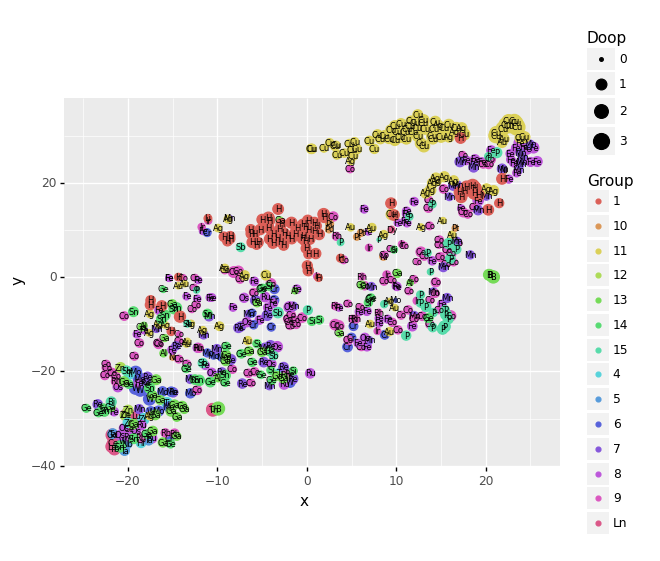

<ggplot: (128553311004)>

In [184]:
ggplot(df_tsne, aes(x="x", y="y")) + geom_point(aes(label="M", colour="Group", size="Doop")) + geom_text(aes(label="M"), size=6)
